In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Concatenate, AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import AdditiveAttention
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from utils import eval, eval_training, get_train_test_data
#from Thesis.common.utils import eval, eval_training, get_train_test_data

Training set size: 27154
Validation set size: 9051
Test set size: 9052
label
meniskus_urgent    11064
other               9523
cruciate_urgent     3882
meniskus_low        1549
other_urgent         905
cruciate_low         231
Name: count, dtype: int64


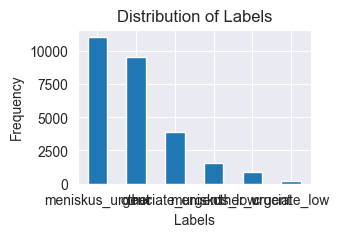

In [14]:
import pandas as pd

data_label = "data"
predict_label = "label"
balanced = False
labels = None#["meniskus_urgent", "cruciate_urgent"]
class_weights = False
sample_weights = False
df = pd.read_csv('../data/balanced_classification_dataset.csv')

train_padded, valid_padded, test_padded, train_labels, valid_labels, test_labels, label_encoder, num_classes, max_length, word_index, class_weights, sample_weights = get_train_test_data(df, data_label, predict_label, balanced=balanced, lables=labels, class_weights=class_weights, sample_weights=sample_weights)


In [32]:
# Define model parameters
embedding_dim = 300  # Dimension of the embedding vectors
lstm_units = 64  # Number of LSTM units
optimizer = Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
epochs = 10
batch_size = 64
metrics=[
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.F1Score(name='f1_score'),
]

In [22]:
# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=32, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=16, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=8))(embedding)


# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [5]:
history = model.fit(train_padded, train_labels, epochs=1, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

2024-07-21 12:05:10.855241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


468/468 ━━━━━━━━━━━━━━━━━━━━ 51s 103ms/step - accuracy: 0.7975 - auc: 0.8831 - f1_score: 0.6783 - loss: 0.4234 - val_accuracy: 0.8589 - val_auc: 0.9333 - val_f1_score: 0.8226 - val_loss: 0.3276


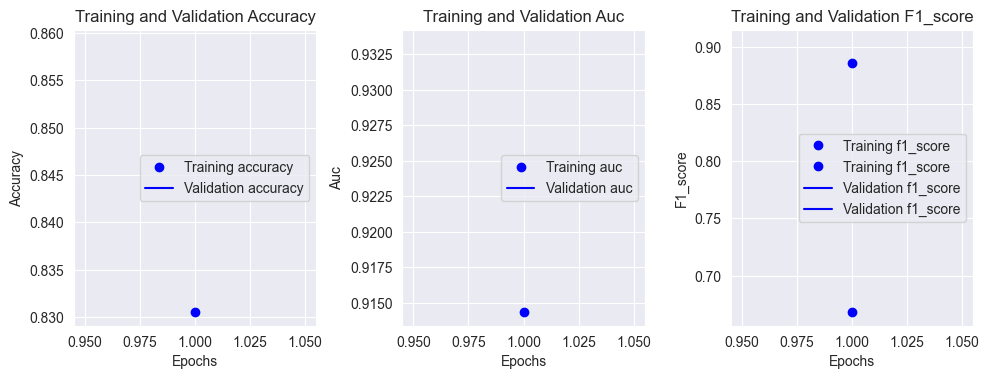

156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


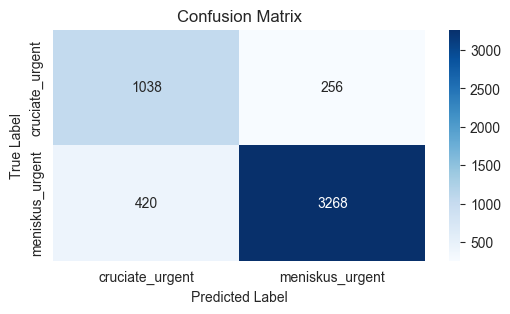

TypeError: can only concatenate str (not "numpy.float64") to str

In [6]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)

In [16]:
# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=32, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=16, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=8))(embedding)


# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
history = model.fit(train_padded, train_labels, epochs=10, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

Epoch 1/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 105s 122ms/step - accuracy: 0.4795 - auc: 0.8412 - f1_score: 0.2359 - loss: 1.2430 - val_accuracy: 0.5782 - val_auc: 0.8809 - val_f1_score: 0.2953 - val_loss: 1.0867
Epoch 2/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 100s 118ms/step - accuracy: 0.6328 - auc: 0.9008 - f1_score: 0.3273 - loss: 0.9921 - val_accuracy: 0.5932 - val_auc: 0.8871 - val_f1_score: 0.3116 - val_loss: 1.0608
Epoch 3/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 104s 122ms/step - accuracy: 0.6858 - auc: 0.9219 - f1_score: 0.3675 - loss: 0.8785 - val_accuracy: 0.5905 - val_auc: 0.8848 - val_f1_score: 0.3244 - val_loss: 1.0809
Epoch 4/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 109s 128ms/step - accuracy: 0.7278 - auc: 0.9393 - f1_score: 0.4336 - loss: 0.7719 - val_accuracy: 0.5834 - val_auc: 0.8780 - val_f1_score: 0.3327 - val_loss: 1.1380
Epoch 5/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 110s 130ms/step - accuracy: 0.7618 - auc: 0.9529 - f1_score: 0.4936 - loss: 0.6777 - val_accuracy: 0.5647 - val_auc: 0.8655 - val_f1_sco

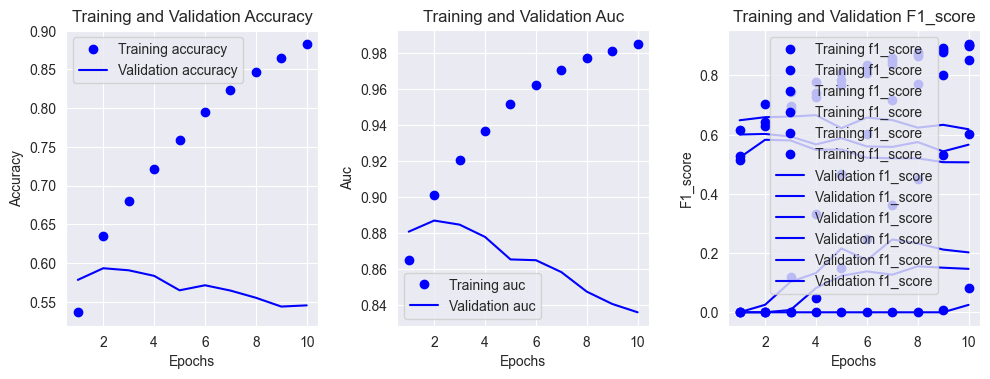

283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step


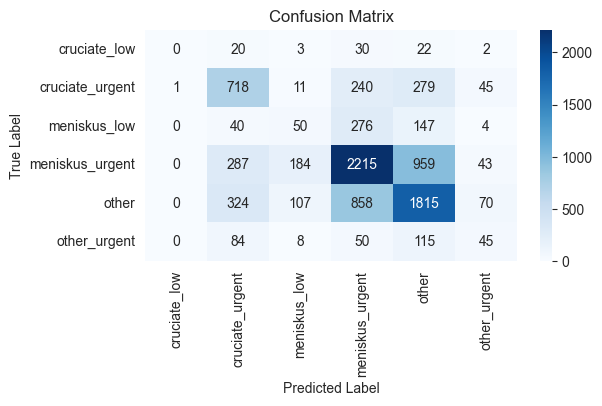

TypeError: can only concatenate str (not "numpy.float64") to str

In [18]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)

Less Layers

In [22]:
# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=32))(embedding)


# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [23]:
history = model.fit(train_padded, train_labels, epochs=10, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

Epoch 1/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 103s 119ms/step - accuracy: 0.4936 - auc: 0.8498 - f1_score: 0.2421 - loss: 1.1991 - val_accuracy: 0.5995 - val_auc: 0.8891 - val_f1_score: 0.3106 - val_loss: 1.0474
Epoch 2/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 101s 119ms/step - accuracy: 0.6426 - auc: 0.9073 - f1_score: 0.3543 - loss: 0.9584 - val_accuracy: 0.5857 - val_auc: 0.8841 - val_f1_score: 0.3428 - val_loss: 1.0809
Epoch 3/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 106s 125ms/step - accuracy: 0.6946 - auc: 0.9281 - f1_score: 0.4359 - loss: 0.8416 - val_accuracy: 0.5925 - val_auc: 0.8895 - val_f1_score: 0.3422 - val_loss: 1.0566
Epoch 4/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 109s 128ms/step - accuracy: 0.7266 - auc: 0.9423 - f1_score: 0.4898 - loss: 0.7526 - val_accuracy: 0.5907 - val_auc: 0.8851 - val_f1_score: 0.3609 - val_loss: 1.1231
Epoch 5/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 109s 128ms/step - accuracy: 0.7777 - auc: 0.9579 - f1_score: 0.5613 - loss: 0.6375 - val_accuracy: 0.5826 - val_auc: 0.8730 - val_f1_sco

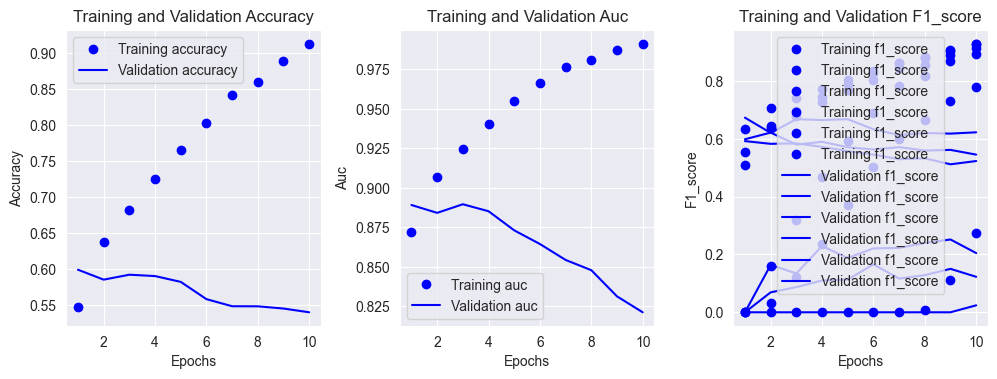

283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step


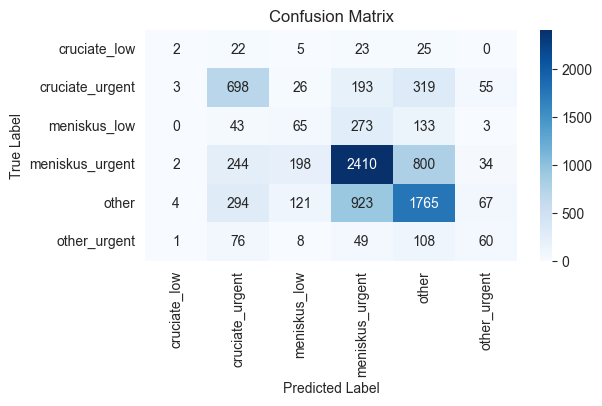

TypeError: can only concatenate str (not "numpy.float64") to str

In [24]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)

# Uniform Layers

In [29]:
# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=64))(embedding)


# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [30]:
history = model.fit(train_padded, train_labels, epochs=10, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

Epoch 1/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 103s 118ms/step - accuracy: 0.5112 - auc: 0.8548 - f1_score: 0.2575 - loss: 1.1819 - val_accuracy: 0.5986 - val_auc: 0.8900 - val_f1_score: 0.3222 - val_loss: 1.0460
Epoch 2/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 99s 116ms/step - accuracy: 0.6432 - auc: 0.9059 - f1_score: 0.3623 - loss: 0.9650 - val_accuracy: 0.6008 - val_auc: 0.8904 - val_f1_score: 0.3546 - val_loss: 1.0439
Epoch 3/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 101s 119ms/step - accuracy: 0.6818 - auc: 0.9226 - f1_score: 0.4402 - loss: 0.8741 - val_accuracy: 0.5995 - val_auc: 0.8887 - val_f1_score: 0.3572 - val_loss: 1.0692
Epoch 4/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 102s 121ms/step - accuracy: 0.7317 - auc: 0.9419 - f1_score: 0.4981 - loss: 0.7550 - val_accuracy: 0.5862 - val_auc: 0.8842 - val_f1_score: 0.3534 - val_loss: 1.0958
Epoch 5/10
849/849 ━━━━━━━━━━━━━━━━━━━━ 103s 122ms/step - accuracy: 0.7701 - auc: 0.9557 - f1_score: 0.5658 - loss: 0.6572 - val_accuracy: 0.5730 - val_auc: 0.8733 - val_f1_scor

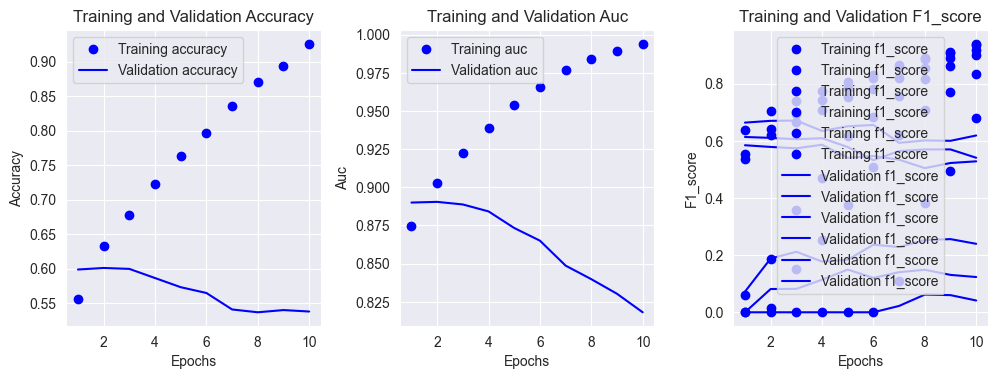

283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step


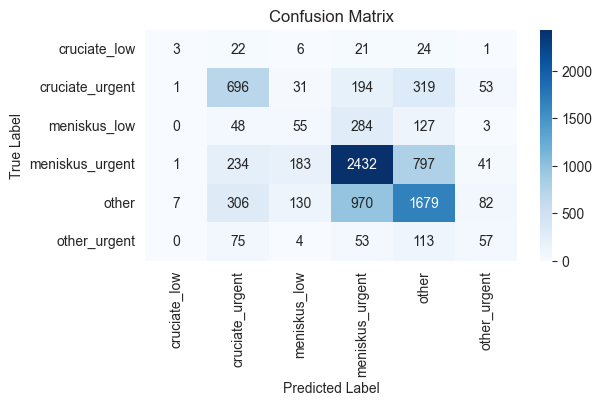

TypeError: can only concatenate str (not "numpy.float64") to str

In [31]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)